# Forecasting Methods

In this notebook, we will try to use our utility functions

## Imports

In [2]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import tensorflow as tf

## Utilities

In [3]:
def mse(signal1, signal2):
    if signal1.shape != signal2.shape:
        print('Shapes do not match')
        return None
    
    return ((signal2 - signal1)**2).mean()

In [4]:
def mae(signal1, signal2):
    if signal1.shape != signal2.shape:
        print('Shapes do not match')
        return None
    
    return np.abs(signal1 - signal2).mean()

In [5]:
def rmse(signal1, signal2):
    if signal1.shape != signal2.shape:
        print('Shapes do not match')
        return None
    
    return np.sqrt(((signal1 - signal2) ** 2).mean())

In [6]:
arr1 = np.array([1,2,3,4], dtype=np.float32)
arr2 = np.array([5,5,5,5], dtype=np.float32)

print(mse(arr1, arr2))
print(tf.keras.metrics.mean_squared_error(arr1, arr2).numpy())

print(mae(arr1, arr2))
print(tf.keras.metrics.mean_absolute_error(arr1, arr2).numpy())

print(rmse(arr1, arr2))
print(tf.keras.metrics.mean_squared_error(arr1, arr2).numpy()**0.5)

7.5
7.5
2.5
2.5
2.738613
2.7386127875258306


In [7]:
def plot_graph(x, y, type="", info="", ylim=None, no_fit=False):
    plt.plot(x, y, 'b')
    plt.title(type)

    if no_fit == False:
        res = linregress(x,y)
        fit_line = res.intercept + res.slope * x
        plt.plot(x, fit_line, 'r', linestyle='--')
        plt.legend([info, 'fit line (Trend)'])

    plt.ylabel('data')
    plt.xlabel('time')
    if ylim is not None:
        plt.ylim(bottom=ylim)
    plt.grid(True)

    plt.show()

In [8]:
def multi_plot_graph(x, y, type="", info="", ylim=None, no_fit=False):
    for y_i in y:
        plt.plot(x, y_i)
    
    plt.title(type)
    
    plt.ylabel('data')
    plt.xlabel('time')
    if ylim is not None:
        plt.ylim(bottom=ylim)
    
    plt.grid(True)
    plt.show()

## Moving Average

In [9]:
def moving_average(signal, window):
    num = len(signal)
    forecast = np.zeros(num)

    for value in range(window, num):
        window_start = value - window
        window_end = value-1
        avg = signal[window_start:window_end].mean()
        forecast[value] = avg

    return forecast

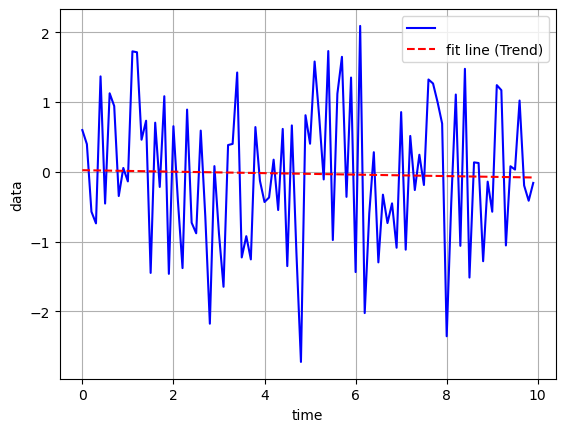

In [10]:
t = np.arange(0,10,0.1)
x = np.random.randn(len(t))
plot_graph(t, x)

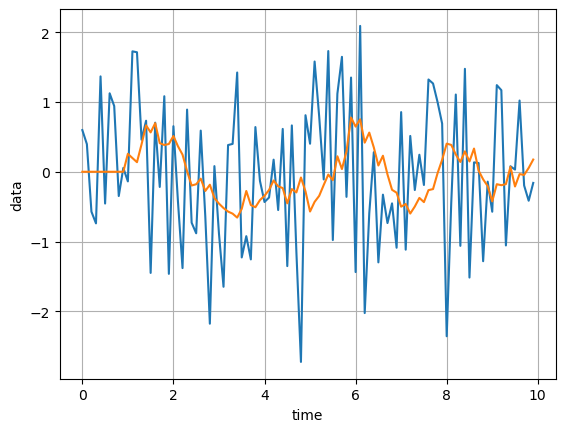

In [11]:
pattern = moving_average(x,10)
multi_plot_graph(t, (x, pattern))

Moving average of sin wave

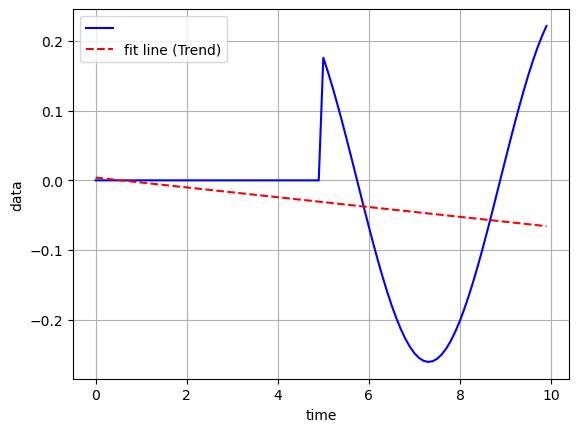

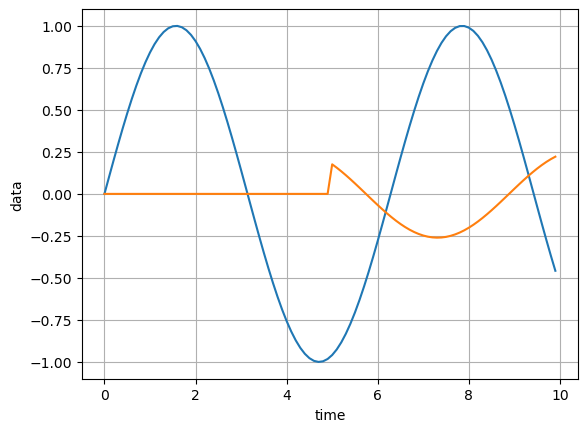

In [12]:
t = np.arange(0, 10, 0.1)
signal = np.sin(t)

pattern = moving_average(signal, 50)
plot_graph(t, pattern)
multi_plot_graph(t, (signal, pattern))

Moving average of rectangular wave

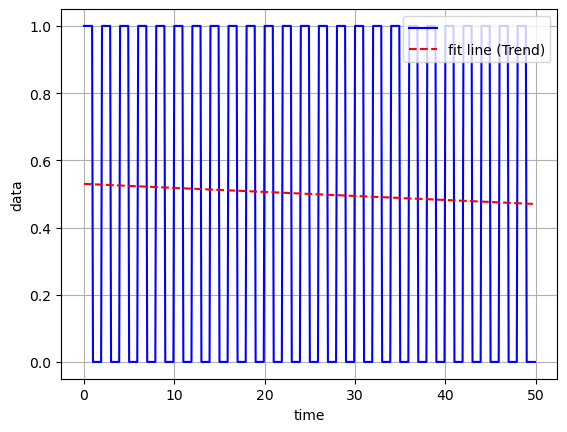

In [33]:
t = np.arange(0, 50, 0.1)
rect_signal = np.where(np.int8(t) % 2 == 0, 1, 0)

plot_graph(t, rect_signal)

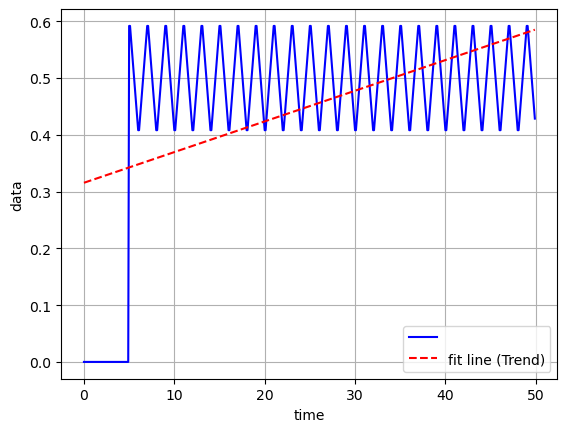

In [37]:
mv_avg_signal = moving_average(rect_signal, 50)
plot_graph(t, mv_avg_signal)

## Differencing

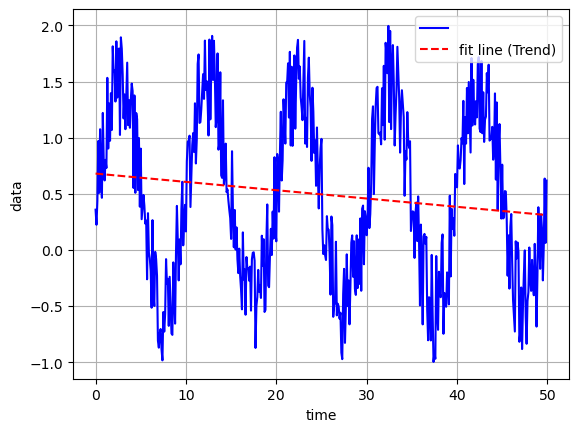

In [74]:
signal = np.sin(2 * np.pi * t/10) + np.random.rand(len(t))
plot_graph(t, signal)

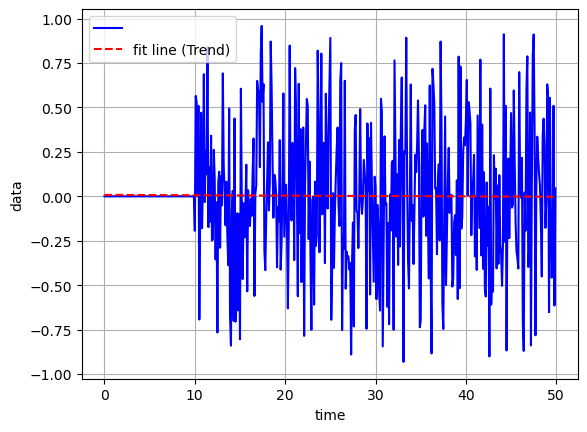


    In This graph, we have successfully 
      removed the seasonality of sine wave



In [75]:
period = 100
diff = np.zeros(len(signal))
diff[period:] = signal[period:] - signal[:-period]
plot_graph(t, diff)
print('''
    In This graph, we have successfully 
      removed the seasonality of sine wave
''')

In [76]:
arr = np.random.randint(0,100, (10))
print(arr)

print(arr[:-4])

[45 33 23 27  4 60 12 14 16 73]
[45 33 23 27  4 60]


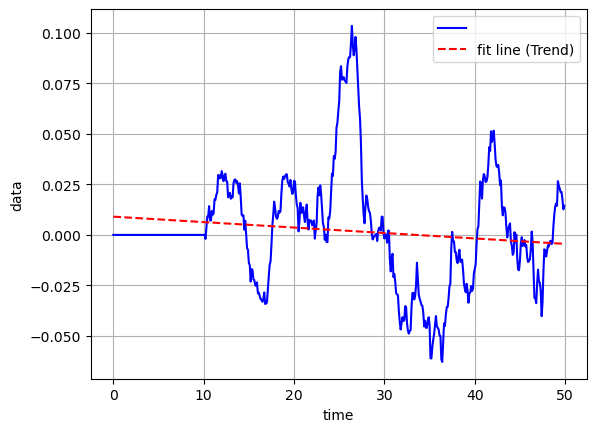

In [80]:
mv_avg_signal = moving_average(diff, 100)
plot_graph(t, mv_avg_signal)

## Recreating sample signal from notebook

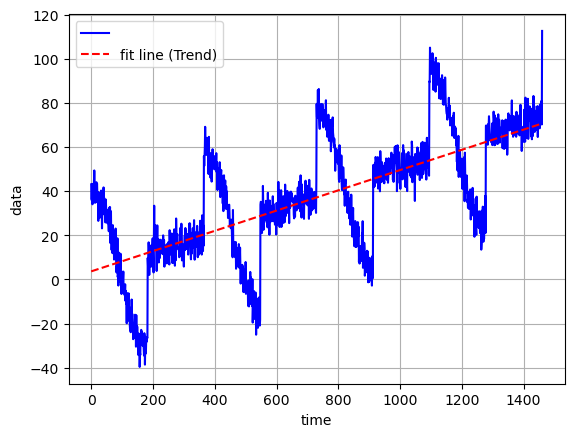

In [252]:
def trend(time, slope):
    return time * slope

def seasonality(time, period):
    # time = time % period
    time = ( time % period ) / period
    pattern = np.where(time < 0.5, np.cos(2 * np.pi * time), 1 / np.exp(5 * time))
    return pattern

# def noise(time, amplitude):
#     return np.random.randint(-amplitude, amplitude + 1, len(time))

def noise(time, amplitude):
    return np.random.randn(len(time)) * amplitude

t = np.arange(0, 4 * 365 + 1)
org_sig = trend(t, 0.05) + 40 * seasonality(t, 365) + noise(t, 5)

plot_graph(t, org_sig)

## Splitting into training & validation

In [253]:
split_time = 3*365
t_train = t[:split_time]
x_train = org_sig[:split_time]

t_valid = t[split_time:]
x_valid = org_sig[split_time:]

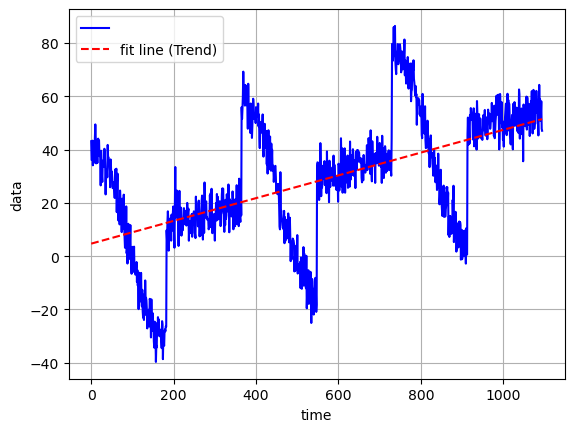

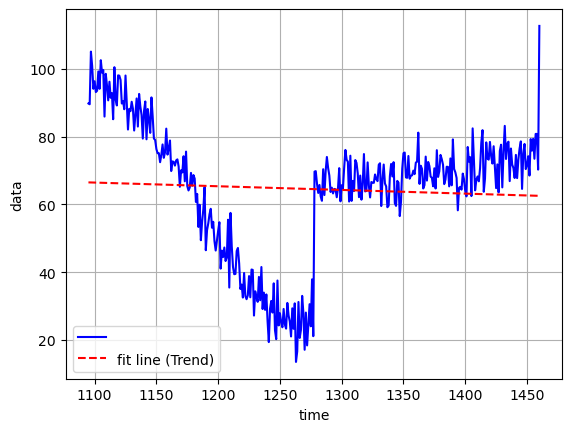

In [257]:
plot_graph(t_train, x_train)
plot_graph(t_valid, x_valid)

## Naive Forecast

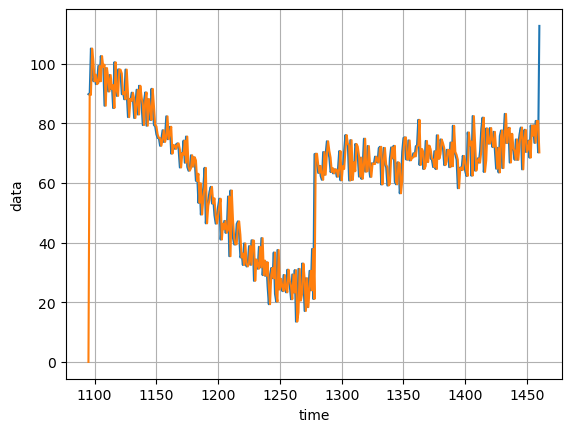

80.2691690867432
5.901197213606651
8.95930628378912


In [267]:
n_forecast = np.zeros(len(x_valid) + 1)
n_forecast[1:] = x_valid
n_forecast = n_forecast[:-1]

multi_plot_graph(t_valid, (x_valid, n_forecast))
print(mse(n_forecast, x_valid))
print(mae(n_forecast, x_valid))
print(rmse(n_forecast, x_valid))

## Moving average of signal

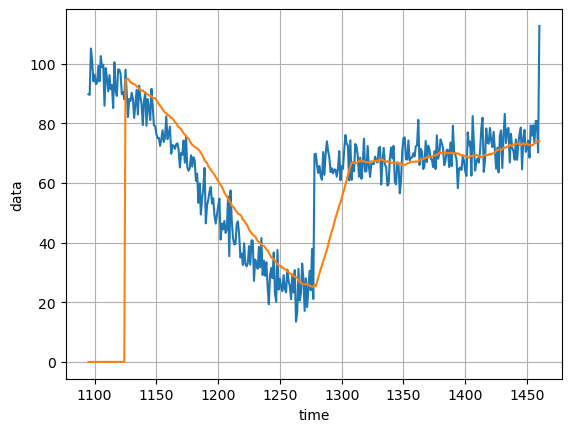

836.8149798736304
14.708984845700773
28.92775449068991

    As you can see, we have smoothen out the signal 
    using moving average, but the new signal is worse than 
    naive forecasting !!



In [272]:
mv_avg_signal = moving_average(x_valid, 30)
multi_plot_graph(t_valid, (x_valid, mv_avg_signal))
print(mse(x_valid, mv_avg_signal))
print(mae(x_valid, mv_avg_signal))
print(rmse(x_valid, mv_avg_signal))

print('''
    As you can see, we have smoothen out the signal 
    using moving average, but the new signal is worse than 
    naive forecasting !!
''')

## Differencing

To remove trend and seasonality from our data, we are using differncing

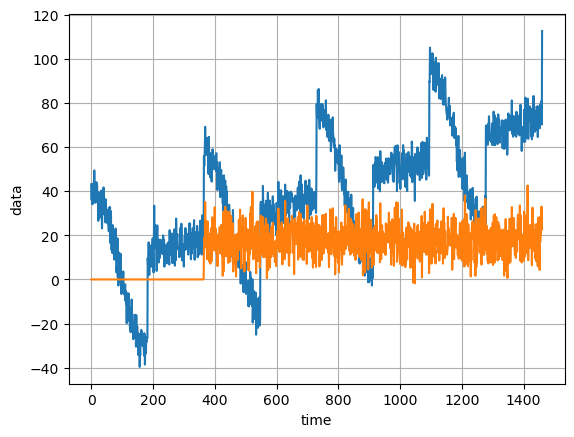

In [278]:
diff = org_sig[365:] - org_sig[:-365]
diff_forecast = np.zeros(len(org_sig))
diff_forecast[365:] = diff

multi_plot_graph(t, (org_sig, diff_forecast))

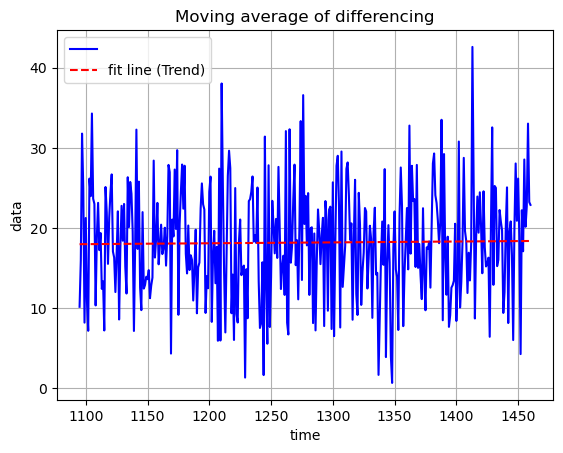

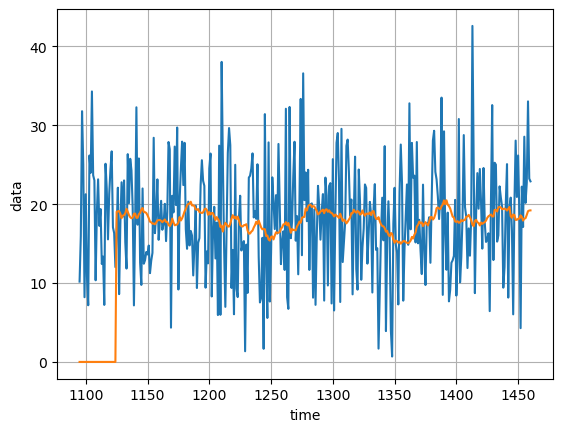

In [284]:
diff_forecast_val = diff_forecast[split_time:]
plot_graph(t_valid, diff_forecast_val, "Moving average of differencing")

mv_avg_diff_signal = moving_average(diff_forecast_val,30)
multi_plot_graph(t_valid, (diff_forecast_val, mv_avg_diff_signal))

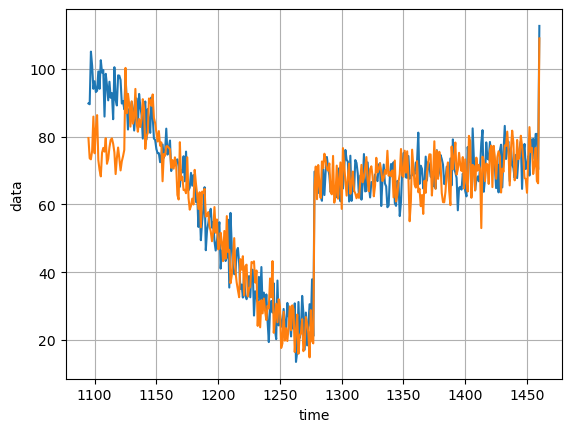

In [290]:
pattern = org_sig[split_time - 365: -365] + mv_avg_diff_signal
multi_plot_graph(t_valid, (x_valid, pattern))

In [292]:
print(mse(x_valid, pattern))
print(mae(x_valid, pattern))
print(rmse(x_valid, pattern))

80.81931809949675
6.776716845928361
8.989956512658821


## Smoothening curves using moving average

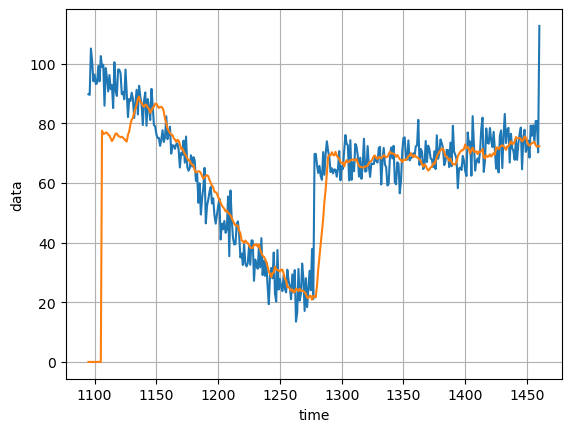

In [293]:
smooth_cuvre = moving_average(pattern, 11)
multi_plot_graph(t_valid, (x_valid, smooth_cuvre))

In [295]:
print(mse(smooth_cuvre[50:], x_valid[50:]))
print(mae(smooth_cuvre[50:], x_valid[50:]))
print(rmse(smooth_cuvre[50:], x_valid[50:]))

68.39402747239282
5.593227110334341
8.27006816612734
